In [37]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import timeit

In [48]:
products_df = pd.read_excel('/content/Vibe_rec.xlsx')

model = SentenceTransformer('all-MiniLM-L6-v2')

product_embeddings = model.encode(products_df['Description'].tolist())

query = model.encode(["energetic urban chic"])

In [56]:
def get_top_matches(query_vec, product_vecs, top_k=3, threshold=0.7):
    sims = cosine_similarity([query_vec], product_vecs)[0]
    top_indices = sims.argsort()[::-1][:top_k]
    top_scores = sims[top_indices]

    results = []
    for idx, score in zip(top_indices, top_scores):
        if score >= threshold:
            results.append((products_df.iloc[idx]['Name'], score))

    if not results:
        return "No close matches found. Please try different vibe keywords."
    else:
        return results

In [57]:
test_queries = [
    "energetic urban chic",
    "cozy and warm",
    "professional modern outfit"
]

In [58]:
metrics = []
latencies = []

for query in test_queries:
    query_embedding = model.encode(query)

    start_time = timeit.default_timer()
    matches = get_top_matches(query_embedding, product_embeddings)
    latency = timeit.default_timer() - start_time

    latencies.append(latency)
    good_match = any(score > 0.7 for _, score in matches) if isinstance(matches, list) else False
    metrics.append({'query': query, 'good_match': good_match, 'latency_sec': latency})

    print(f"Query: '{query}'\nMatches: {matches}\nLatency: {latency:.4f} seconds\n")

Query: 'energetic urban chic'
Matches: No close matches found. Please try different vibe keywords.
Latency: 0.0009 seconds

Query: 'cozy and warm'
Matches: No close matches found. Please try different vibe keywords.
Latency: 0.0007 seconds

Query: 'professional modern outfit'
Matches: No close matches found. Please try different vibe keywords.
Latency: 0.0009 seconds



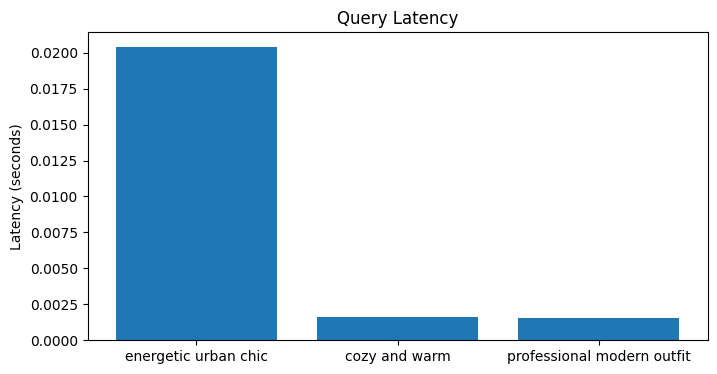

In [43]:
plt.figure(figsize=(8, 4))
plt.bar([m['query'] for m in metrics], [m['latency_sec'] for m in metrics])
plt.ylabel('Latency (seconds)')
plt.title('Query Latency')
plt.show()